In [70]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import math

from src.helpers import get_data

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [71]:
zf = zipfile.ZipFile('data/data.zip')

In [72]:
df = pd.read_json(zf.open('data.json'))

In [73]:
l = df['ticket_types'].str.len()
df1 = pd.DataFrame(np.concatenate(df['ticket_types']).tolist(), index=np.repeat(df.index, l))

df1['total_cost'] = df1['cost'] * df1['quantity_sold']

df3 = df.drop('ticket_types', axis=1).join(df1).reset_index(drop=True)
df1.reset_index(inplace=True)
df2 = df1[['total_cost', 'index']].groupby('index').sum()
df4 = df.join(df2).reset_index()
df4 = df4.drop('index', axis=1)

In [74]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [75]:
df['fraud'] = df['acct_type'].apply(lambda x: True if 'fraud' in x else False)

In [76]:
df['fraud'].value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

<AxesSubplot:>

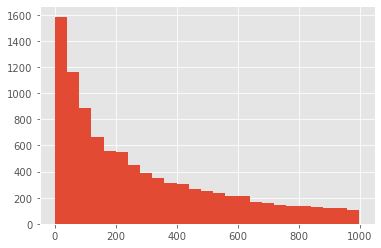

In [77]:
#What is gts?
df['gts'][df['gts']<1000].hist(bins=25)

In [78]:
payout_group = df.groupby('payout_type').mean()
payout_group.reset_index(inplace=True)
payout_group = payout_group[['fraud', 'payout_type']]

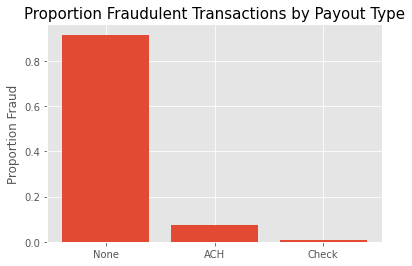

In [79]:
payout_group['payout_type'] = payout_group['payout_type'].apply(lambda x: 'None' if x =='' else x)
payout_group['payout_type'] = payout_group['payout_type'].apply(lambda x: 'Check' if x =='CHECK' else x)

fig, ax = plt.subplots()
ax.bar(payout_group['payout_type'], payout_group['fraud'])
ax.set_title('Proportion Fraudulent Transactions by Payout Type', size = 15)
ax.set_ylabel('Proportion Fraud')
fig.savefig('images/prop_fraud_bypayout.png', bbox_inches = "tight")



In [80]:
df['log_age'] = df['user_age'].apply(lambda x: math.log(x, 2) if x != 0 else 0)

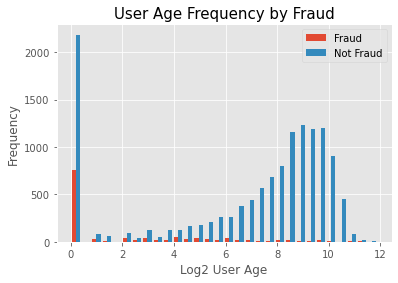

In [81]:
# histogram by user age
age_fraud = df['log_age'][df['fraud'] == True]
age_notfraud = df['log_age'][df['fraud'] == False]
fig, ax = plt.subplots()
ax.hist([age_fraud, age_notfraud], bins=30, label=['Fraud', 'Not Fraud'])

ax.set_title('User Age Frequency by Fraud', size = 15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Log2 User Age')
ax.legend()
fig.savefig('images/User_age_freq.png', bbox_inches = "tight")

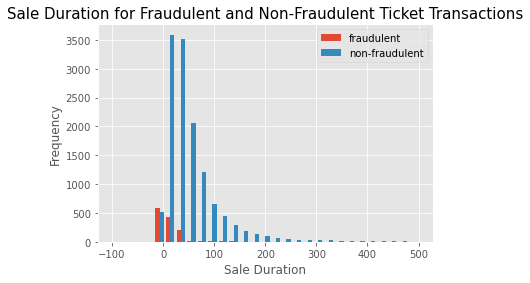

In [82]:
fraud = df['sale_duration2'][df['fraud']==True]
no_fraud = df['sale_duration2'][df['fraud']==False]

bins = np.linspace(-100, 500, 30)
fig, ax = plt.subplots()
ax.hist([fraud, no_fraud], bins, label=['fraudulent', 'non-fraudulent'])
ax.set_title('Sale Duration for Fraudulent and Non-Fraudulent Ticket Transactions', size = 15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Sale Duration')
ax.legend(loc = 'upper right')
fig.savefig('images/sale_duration.png', bbox_inches = "tight")